In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# Importing the CSV

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TestMatch.csv")
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,KD Walters (AUS),1965-1981,74,125,14,5357,250,48.26,8662+,49.16,15,33,4,525+,23
58,GC Smith (ICC/SA),2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24
59,WH Ponsford (AUS),1924-1934,29,48,4,2122,266,48.22,3118+,44.77,7,6,1,119+,0
60,SJ McCabe (AUS),1930-1938,39,62,5,2748,232,48.21,3217+,60.02,6,13,4,241+,5+


In [ ]:
# Renaming The Columns

In [ ]:
df = df.rename(columns = {'NO':'Not_Outs','HS':'Highest_inning_score','BF':'Balls_Faced',
                          'SR':'Batting_Strike_Rate','Mat':'Matches','Ave':'Average'})

In [ ]:
df.head()


,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_inning_score,Average,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1


In [ ]:
# Checking And filling the null value

In [ ]:
df.isnull().any()

Player                  False
Span                    False
Matches                 False
Inns                    False
Not_Outs                False
Runs                    False
Highest_inning_score    False
Average                 False
Balls_Faced             False
Batting_Strike_Rate     False
100                     False
50                      False
0                       False
4s                      False
6s                      False
dtype: bool

In [ ]:
df[df['Balls_Faced'].isna()==1]

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_inning_score,Average,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s


It is not a good practice to fill NaN values with 0 . Only done for project purpose


In [ ]:
df['Balls_Faced'] = df['Balls_Faced'].fillna(0)
df['Batting_Strike_Rate'] = df['Batting_Strike_Rate'].fillna(0)

In [ ]:
df.isnull().any()

Player                  False
Span                    False
Matches                 False
Inns                    False
Not_Outs                False
Runs                    False
Highest_inning_score    False
Average                 False
Balls_Faced             False
Batting_Strike_Rate     False
100                     False
50                      False
0                       False
4s                      False
6s                      False
dtype: bool

In [ ]:
df[df['Player'] == 'ED Weekes (WI)']

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_inning_score,Average,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s
8,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,-,0.0,15,19,6,258+,2


In [ ]:
# Dropping Duplicates

In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
57    False
58    False
59    False
60    False
61    False
Length: 62, dtype: bool

We dont have duplicates in this dataset . Otherwise we can drop them using **drop_duplicates()**

In [ ]:
# Split Span in Start and End Dates

In [ ]:
df['Span'].str.split(pat = '-')

0     [1928, 1948]
1     [2022, 2023]
2     [2015, 2016]
3     [1963, 1970]
4     [1930, 1954]
          ...     
57    [1965, 1981]
58    [2002, 2014]
59    [1924, 1934]
60    [1930, 1938]
61    [1928, 1934]
Name: Span, Length: 62, dtype: object

In [ ]:
df['Rookie_year'] = df['Span'].str.split(pat = '-').str[0]

In [ ]:
df['Final_year'] = df['Span'].str.split(pat = '-').str[1]

In [ ]:
df.head(5)

,Player,Span,Matches,Inns,Not_Outs,Runs,Highest_inning_score,Average,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Rookie_year,Final_year
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1,1930,1954


In [ ]:
# Drop Span Column

In [ ]:
df = df.drop(['Span'], axis =1)

In [ ]:
df.head(5)

,Player,Matches,Inns,Not_Outs,Runs,Highest_inning_score,Average,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Rookie_year,Final_year
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948
1,HC Brook (ENG),12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023
2,AC Voges (AUS),20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016
3,RG Pollock (SA),23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970
4,GA Headley (WI),22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1,1930,1954


In [ ]:
# Splitting Country And Player Name

In [ ]:
df['Player'].str.split(pat = '(').str[0]

0      DG Bradman 
1        HC Brook 
2        AC Voges 
3      RG Pollock 
4      GA Headley 
          ...     
57     KD Walters 
58       GC Smith 
59    WH Ponsford 
60      SJ McCabe 
61     DR Jardine 
Name: Player, Length: 62, dtype: object

In [ ]:
df['country'] = df['Player'].str.split(pat = '(').str[1]

In [ ]:
df['country'] = df['country'].str.split(pat = ')').str[0]

In [ ]:
df['country']

0        AUS
1        ENG
2        AUS
3         SA
4         WI
       ...  
57       AUS
58    ICC/SA
59       AUS
60       AUS
61       ENG
Name: country, Length: 62, dtype: object

In [ ]:
df['Player'] = df['Player'].str.split(pat = '(').str[0]

In [ ]:
df.head(5)


,Player,Matches,Inns,Not_Outs,Runs,Highest_inning_score,Average,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Rookie_year,Final_year,country
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948,AUS
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG
2,AC Voges,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970,SA
4,GA Headley,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1,1930,1954,WI


In [ ]:
# Change The data types

In [ ]:
df.dtypes

Player                   object
Matches                   int64
Inns                      int64
Not_Outs                  int64
Runs                      int64
Highest_inning_score     object
Average                 float64
Balls_Faced              object
Batting_Strike_Rate     float64
100                       int64
50                        int64
0                         int64
4s                       object
6s                       object
Rookie_year              object
Final_year               object
country                  object
dtype: object

Since some column contains * or + signs their data type is showing as object . we have to clean them before changing the data type

In [ ]:
df['Highest_inning_score'] = df['Highest_inning_score'].str.split(pat = '*').str[0]

In [ ]:
df.head(5)

,Player,Matches,Inns,Not_Outs,Runs,Highest_inning_score,Average,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Rookie_year,Final_year,country
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948,AUS
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970,SA
4,GA Headley,22,40,4,2190,270,60.83,416+,56.00,10,5,2,104+,1,1930,1954,WI


In [ ]:
df['Highest_inning_score'] = df['Highest_inning_score'].astype('int')

In [ ]:
df.dtypes

Player                   object
Matches                   int64
Inns                      int64
Not_Outs                  int64
Runs                      int64
Highest_inning_score      int64
Average                 float64
Balls_Faced              object
Batting_Strike_Rate     float64
100                       int64
50                        int64
0                         int64
4s                       object
6s                       object
Rookie_year              object
Final_year               object
country                  object
dtype: object

In [ ]:
df = df.astype({'Rookie_year':'int', 'Final_year':'int'})

In [ ]:
df.dtypes

Player                   object
Matches                   int64
Inns                      int64
Not_Outs                  int64
Runs                      int64
Highest_inning_score      int64
Average                 float64
Balls_Faced              object
Batting_Strike_Rate     float64
100                       int64
50                        int64
0                         int64
4s                       object
6s                       object
Rookie_year               int64
Final_year                int64
country                  object
dtype: object

In [ ]:
df['4s'] = df['4s'].str.split(pat = '+').str[0]

In [ ]:
df.dtypes

Player                   object
Matches                   int64
Inns                      int64
Not_Outs                  int64
Runs                      int64
Highest_inning_score      int64
Average                 float64
Balls_Faced              object
Batting_Strike_Rate     float64
100                       int64
50                        int64
0                         int64
4s                       object
6s                       object
Rookie_year               int64
Final_year                int64
country                  object
dtype: object

In [ ]:
df['6s'] = df['6s'].str.split(pat = '+').str[0]

In [ ]:
df = df.astype({'4s':'int', '6s':'int'})

In [ ]:
df.dtypes

Player                   object
Matches                   int64
Inns                      int64
Not_Outs                  int64
Runs                      int64
Highest_inning_score      int64
Average                 float64
Balls_Faced              object
Batting_Strike_Rate     float64
100                       int64
50                        int64
0                         int64
4s                        int64
6s                        int64
Rookie_year               int64
Final_year                int64
country                  object
dtype: object

In [ ]:
df['Balls_Faced'] = df['Balls_Faced'].fillna(0)

In [ ]:
df['Balls_Faced'].str.split(pat = '+').str[1]

0        
1     NaN
2     NaN
3        
4        
     ... 
57       
58    NaN
59       
60       
61       
Name: Balls_Faced, Length: 62, dtype: object

In [ ]:
df['Balls_Faced'] = df['Balls_Faced'].str.split(pat = '+').str[0]

In [ ]:
df['Balls_Faced'].isna().sum()

0

In [ ]:
df['Balls_Faced'] = df['Balls_Faced'].fillna(0)

In [ ]:
df['Balls_Faced'].isna().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player                62 non-null     object 
 1   Matches               62 non-null     int64  
 2   Inns                  62 non-null     int64  
 3   Not_Outs              62 non-null     int64  
 4   Runs                  62 non-null     int64  
 5   Highest_inning_score  62 non-null     int64  
 6   Average               62 non-null     float64
 7   Balls_Faced           62 non-null     object 
 8   Batting_Strike_Rate   62 non-null     float64
 9   100                   62 non-null     int64  
 10  50                    62 non-null     int64  
 11  0                     62 non-null     int64  
 12  4s                    62 non-null     int64  
 13  6s                    62 non-null     int64  
 14  Rookie_year           62 non-null     int64  
 15  Final_year            62 

In [ ]:
df['Balls_Faced'] = df['Balls_Faced'].str.replace('-', '0')

In [ ]:
df['Balls_Faced'] = df['Balls_Faced'].astype('int')

In [ ]:
df.dtypes

Player                   object
Matches                   int64
Inns                      int64
Not_Outs                  int64
Runs                      int64
Highest_inning_score      int64
Average                 float64
Balls_Faced               int64
Batting_Strike_Rate     float64
100                       int64
50                        int64
0                         int64
4s                        int64
6s                        int64
Rookie_year               int64
Final_year                int64
country                  object
dtype: object

In [ ]:
# Creating Carrer length Column

In [ ]:
df['Career_length'] = df['Final_year'] - df['Rookie_year']

In [ ]:
df.head(5)

,Player,Matches,Inns,Not_Outs,Runs,Highest_inning_score,Average,Balls_Faced,Batting_Strike_Rate,100,50,0,4s,6s,Rookie_year,Final_year,country,Career_length
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928,1948,AUS,20
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG,1
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS,1
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963,1970,SA,7
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930,1954,WI,24


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mean Career length

In [ ]:
df['Career_length'].mean()

13.193548387096774

In [ ]:
# Average Batting_Strike_Rate for Crickters who played more than 10 years

In [ ]:
df[df['Career_length']>10]['Batting_Strike_Rate'].mean()

47.94681818181819

In [ ]:
# Number of Crickters who played before 1960

In [ ]:
df[df['Rookie_year']<1960]['Player'].count()

23

In [ ]:
# 4 highest Inns scores by Country

In [ ]:
df.groupby('country')['Highest_inning_score'].max().to_frame('HighInn').sort_values('HighInn',ascending = False)

,HighInn
country,
ICC/WI,400
AUS,380
SL,374
WI,365
ENG,364
ICC/PAK,329
ICC/IND,319
PAK,313
SA,278


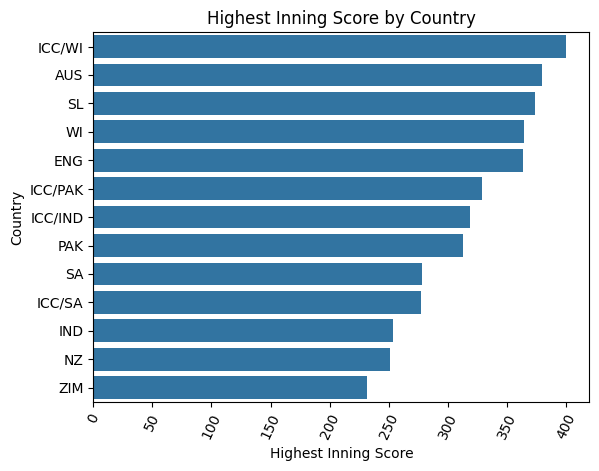

In [ ]:
sns.barplot(
    data = df.groupby('country')['Highest_inning_score'].max().to_frame('HighInn').sort_values('HighInn',ascending = False),
    x = 'HighInn',
    y = 'country'
)

plt.xticks(rotation=65)

plt.title('Highest Inning Score by Country')
plt.xlabel('Highest Inning Score')
plt.ylabel('Country')

plt.show()

In [ ]:
# 500, 100, 0 AVG by Countries

In [ ]:
df.groupby('country')[['100','50','0']].mean()

,100,50,0
country,,,
AUS,20.625000,28.375000,8.562500
ENG,12.384615,20.846154,4.307692
ICC/IND,29.500000,47.500000,12.000000
ICC/PAK,25.000000,46.000000,15.000000
ICC/SA,36.000000,48.000000,13.500000
ICC/WI,34.000000,48.000000,17.000000
IND,29.500000,36.500000,10.750000
NZ,18.500000,22.000000,6.000000
PAK,21.250000,28.000000,9.500000


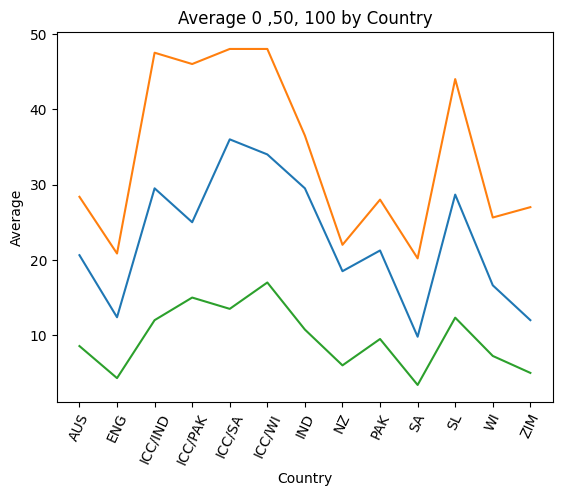

In [ ]:
df_new = df.groupby('country')[['100','50','0']].mean().reset_index()

plt.xticks(rotation=65)
plt.title('Average 0 ,50, 100 by Country')
plt.xlabel('Country')
plt.ylabel('Average')

sns.lineplot(data=df_new, x='country', y='100')
sns.lineplot(data=df_new, x='country', y='50')
sns.lineplot(data=df_new, x='country', y='0')
plt.show()

In [ ]:
# 500, 100, 0 AVG by Players

In [ ]:
df.groupby('Player')[['100','50','0']].mean()

,100,50,0
Player,,,
A Flower,12.0,27.0,5.0
AB de Villiers,22.0,46.0,8.0
AC Voges,5.0,4.0,2.0
AD Nourse,9.0,14.0,3.0
AR Border,27.0,63.0,11.0
...,...,...,...
V Sehwag,23.0,32.0,16.0
VG Kambli,4.0,3.0,3.0
WH Ponsford,7.0,6.0,1.0


In [ ]:
# Top 5 Players With Highest runs

In [ ]:
df.groupby('Player')['Runs'].max().to_frame('Runs').sort_values('Runs',ascending = False).head(5)

,Runs
Player,
SR Tendulkar,15921
RT Ponting,13378
JH Kallis,13289
R Dravid,13288
KC Sangakkara,12400


<Axes: title={'center': 'runs'}, xlabel='Player'>

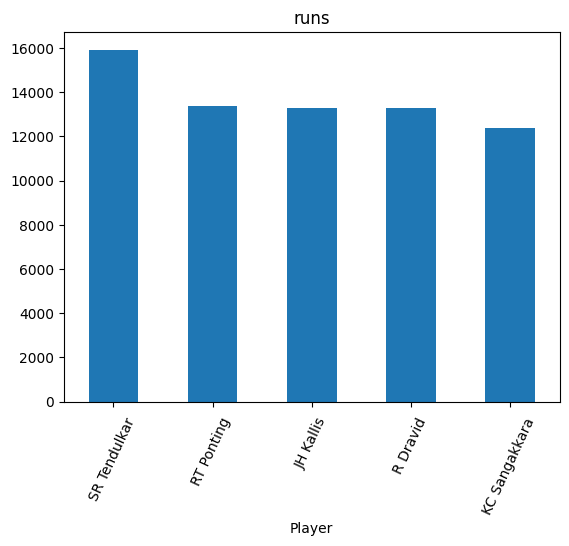

In [ ]:
df.groupby('Player')['Runs'].max().to_frame('Runs').sort_values('Runs',ascending = False).head(5).plot(kind = 'bar',legend = False,rot=65,title="runs" )